In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("whisperingkahuna/gunviolence1")

print("Path to dataset files:", path)

100%|██████████| 13.9k/13.9k [00:00<00:00, 7.46MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/whisperingkahuna/gunviolence1/versions/1


In [3]:
import os

dataset_path = '/root/.cache/kagglehub/datasets/whisperingkahuna/gunviolence1/versions/1'
files = os.listdir(dataset_path)
print("Files in the dataset directory:", files)


Files in the dataset directory: ['updated_with_coordinates.csv']


In [4]:
import pandas as pd

file_path = f"/root/.cache/kagglehub/datasets/whisperingkahuna/gunviolence1/versions/1/updated_with_coordinates.csv"
data = pd.read_csv(file_path)

# Preview the data
print(data.head())


   Incident ID     Incident Date         State City Or County  \
0      3052758  October 21, 2024    Washington      Fall City   
1      3052028  October 20, 2024     Tennessee        Jackson   
2      3051984  October 20, 2024     Louisiana    Baton Rouge   
3      3051041  October 19, 2024  Pennsylvania   Philadelphia   
4      3050940  October 19, 2024   Mississippi      Lexington   

                              Address  Victims Killed  Victims Injured  \
0      7700 block of Lake Alice Rd SE               5                1   
1                 2310 N Highland Ave               1                8   
2  9700 block of Greenwell Springs Rd               0                5   
3                    2517 N Jessup St               0                7   
4                         24904 MS-17               3                8   

   Suspects Killed  Suspects Injured  Suspects Arrested  Operations  Latitude  \
0                0                 0                  1         NaN  47.56812   
1 

In [6]:
print(data.info)
print(data.describe)


<bound method DataFrame.info of      Incident ID     Incident Date         State City Or County  \
0        3052758  October 21, 2024    Washington      Fall City   
1        3052028  October 20, 2024     Tennessee        Jackson   
2        3051984  October 20, 2024     Louisiana    Baton Rouge   
3        3051041  October 19, 2024  Pennsylvania   Philadelphia   
4        3050940  October 19, 2024   Mississippi      Lexington   
..           ...               ...           ...            ...   
422      2794194   January 4, 2024          Iowa          Perry   
423      2792720   January 1, 2024      Missouri    Springfield   
424      2792829   January 1, 2024     Louisiana    Baton Rouge   
425      2791411   January 1, 2024    California    Los Angeles   
426      2840907   January 1, 2024      Illinois        Maywood   

                                Address  Victims Killed  Victims Injured  \
0        7700 block of Lake Alice Rd SE               5                1   
1          

In [9]:
print(data.isnull().sum())

Incident ID            0
Incident Date          0
State                  0
City Or County         0
Address                1
Victims Killed         0
Victims Injured        0
Suspects Killed        0
Suspects Injured       0
Suspects Arrested      0
Operations           427
Latitude               0
Longitude              0
Coordinates_Found      0
dtype: int64


In [10]:
null_rows=data[data['Address'].isnull()]
print(null_rows)

    Incident ID       Incident Date      State City Or County Address  \
35      3034497  September 14, 2024  Louisiana         Monroe     NaN   

    Victims Killed  Victims Injured  Suspects Killed  Suspects Injured  \
35               0                6                0                 0   

    Suspects Arrested  Operations  Latitude  Longitude Coordinates_Found  
35                  0         NaN  32.50983  -92.11879               Yes  


Exploratory Data Analysis:
Incidents over time:

<Axes: title={'center': 'Incidents Over Time'}, xlabel='Incident Date'>

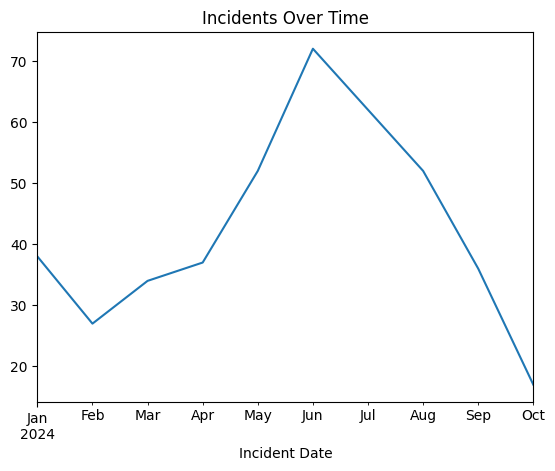

In [14]:
data['Incident Date'] = pd.to_datetime(data['Incident Date'])
incidents_over_time = data.groupby(data['Incident Date'].dt.to_period('M')).size()
incidents_over_time.plot(kind='line', title='Incidents Over Time')


Top cities or states with highest gun violence Indicents:

<Axes: title={'center': 'Top 10 States by Incidents'}, xlabel='State'>

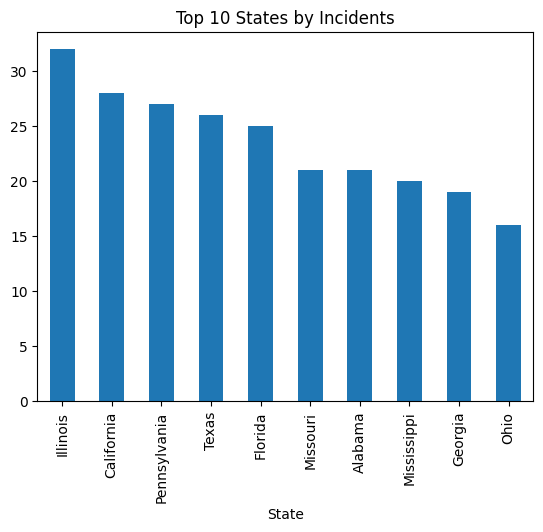

In [15]:
top_states = data['State'].value_counts().head(10)
top_states.plot(kind='bar', title='Top 10 States by Incidents')

<Axes: title={'center': 'Top 10 Cities by Incidents'}, xlabel='City Or County'>

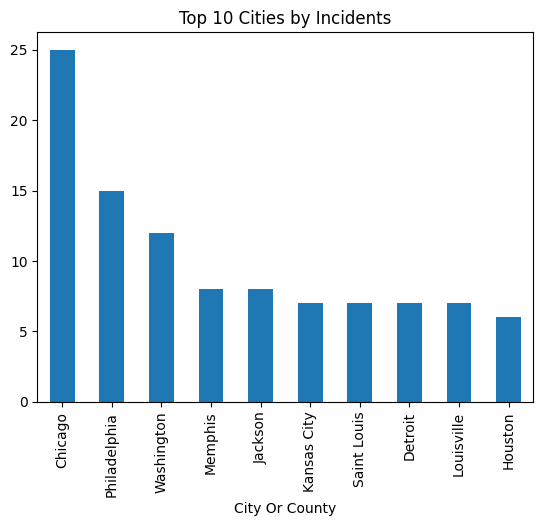

In [17]:
top_cities = data['City Or County'].value_counts().head(10)
top_cities.plot(kind='bar', title='Top 10 Cities by Incidents')


Distribution of Fatalities and Injuries:

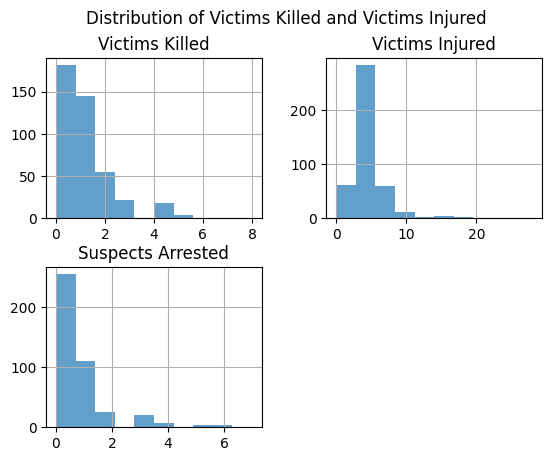

In [23]:
import matplotlib.pyplot as plt

data[['Victims Killed', 'Victims Injured', 'Suspects Arrested']].hist(bins=10, alpha=0.7)
plt.suptitle('Distribution of Victims Killed and Victims Injured')
plt.show()


Visualization:

In [25]:
import folium

# Initialize the map
m = folium.Map(location=[37.0902, -95.7129], zoom_start=5)  # Center on the USA

# Add incidents
for _, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"City: {row['City Or County']}, State: {row['State']}",
    ).add_to(m)

m.save("gun_violence_map.html")
